Xiaoyi Wang

2403234885

# Part 1: Tweet analysis - NER and sentiment extraction

The dataset is a collection of tweets and is split into 2 files - `train.csv` and `test.csv`. Do not use `test.csv` during any stage of the training process. The csv files contain the following columns:
- `textID` - unique ID for each piece of text
- `text` - the text of the tweet
- `sentiment` - the sentiment of the tweet (positive, negative, neutral)

1. Import necessary libraries, and load both the train and test datasets into pandas dataframes.

In [6]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.sample(5)

,textID,text,selected_text,sentiment
3539,e9a87971b0,i need some hot green tea I cant sleep ....,cant sleep ....,negative
8916,bff0c7715b,Finished Death Du Jour. School`s out. Nerd.,Finished Death Du Jour. School`s out. Nerd.,neutral
6448,3bade8ec46,Good for you! I don`t think I`ll be joining l...,WHEE!,positive
4022,2a7f29502f,Florida should be nice.,nice.,positive
2207,1943a08c94,I forgot about it and I already ate lunch so...,I forgot about it and I already ate lunch so ...,neutral


In [9]:
train = train.drop('selected_text', axis=1)
train.sample(5)

,textID,text,sentiment
6878,3d8e8979e4,http://bit.ly/253ce :: I got bit in the face ...,neutral
477,3c8e8d1940,my son got stung by a bug for the first time ...,negative
17101,04100a8743,Morning. Tweet Tweet.,neutral
10826,e1a023ed94,not good you`re not comin close to where i lo...,neutral
25061,99ee365e3b,"Apple is also rotten in the center, just my luck",negative


In [8]:
test.sample(5)

,textID,text,sentiment
3250,1012d3a39c,Oh dear... that`s just... disturbing. The c...,negative
3284,864cddfae8,ooo my goddddd; vodafone trouble. no network,negative
1712,8f3fc77f66,- brief interruption- brb. goodnight if i ...,positive
3306,6ff929e04b,_xo Today yeah,neutral
98,af63915fa9,I`m leaving work now. Trying to decide if I re...,neutral


2. Check for any missing values in the train and test datasets. If there are any, drop the rows with missing values.

In [11]:
train.isnull().sum()

textID       0
text         1
sentiment    0
dtype: int64

In [12]:
test.isnull().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [16]:
# dropping the row with missing values in train
train = train.dropna()

In [17]:
train.isnull().sum()

textID       0
text         0
sentiment    0
dtype: int64

3. Check the distributions of the `sentiment` in the train and test datasets. Comment if there are any differences and whether this is a problem.

In [19]:
train['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [30]:
train['sentiment'].value_counts()/len(train)

neutral     0.404549
positive    0.312300
negative    0.283151
Name: sentiment, dtype: float64

<AxesSubplot:>

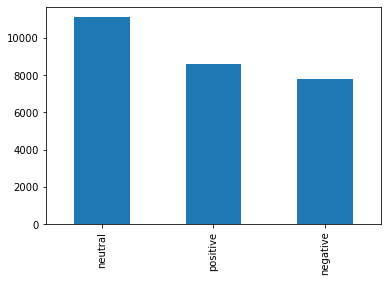

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
train['sentiment'].value_counts().plot(kind='bar', ax=ax, label='Train Dataset')

In [20]:
test['sentiment'].value_counts()

neutral     1430
positive    1103
negative    1001
Name: sentiment, dtype: int64

In [31]:
test['sentiment'].value_counts()/len(test)

neutral     0.404641
positive    0.312111
negative    0.283248
Name: sentiment, dtype: float64

<AxesSubplot:>

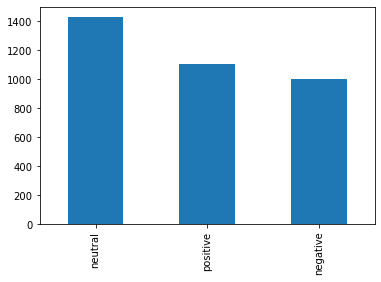

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
test['sentiment'].value_counts().plot(kind='bar', ax=ax, label='Test Dataset')

There is no significant difference in the sentiment distributions between the train and test dataset.

4. Split the training dataset into train and validation sets. The validation set will be used to evaluate the model performance, tune hyperparameters, and make improvements during training. The test set will only be used to evaluate the final model performance.

In [32]:
from sklearn.model_selection import train_test_split

X = train['text']
y = train['sentiment']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

5. Use TF-IDF to vectorize the tweets. Write a function to take in various classifiers (`SGDClassifier`, `RidgeClassifier`, `LinearSVC`, etc.) and train them on the training set. The function should return the predictions so that it can be evaluated on the validation set.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

def train_classifier(X_train, X_val, y_train, classifier):
    # Initialize the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    
    # Perform TF-IDF vectorization on the training and validation text data
    train_features = vectorizer.fit_transform(X_train)
    validation_features = vectorizer.transform(X_val)

    # Train the classifier on the training features and labels
    classifier.fit(train_features, y_train)
        
    # Make predictions on the validation set
    pred = classifier.predict(validation_features)
    
    return pred

6. Now run the function on the validation set and print the `classification_report` for `SGDClassifier`, `RidgeClassifier` and `LinearSVC`. Which classifier performs the best?

In [34]:
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.svm import LinearSVC

# Get the predictions on various classifiers
pred_sgdc = train_classifier(X_train, X_val, y_train, SGDClassifier())
pred_ridge = train_classifier(X_train, X_val, y_train, RidgeClassifier())
pred_svc= train_classifier(X_train, X_val, y_train, LinearSVC())

In [36]:
from sklearn import metrics

In [37]:
print(metrics.classification_report(y_val,pred_sgdc))

              precision    recall  f1-score   support

    negative       0.72      0.58      0.64      1572
     neutral       0.64      0.75      0.69      2236
    positive       0.78      0.74      0.76      1688

    accuracy                           0.70      5496
   macro avg       0.71      0.69      0.70      5496
weighted avg       0.70      0.70      0.70      5496



In [38]:
print(metrics.classification_report(y_val,pred_ridge))

              precision    recall  f1-score   support

    negative       0.68      0.60      0.64      1572
     neutral       0.63      0.70      0.66      2236
    positive       0.75      0.72      0.73      1688

    accuracy                           0.68      5496
   macro avg       0.69      0.67      0.68      5496
weighted avg       0.68      0.68      0.68      5496



In [39]:
print(metrics.classification_report(y_val,pred_svc))

              precision    recall  f1-score   support

    negative       0.67      0.62      0.65      1572
     neutral       0.63      0.67      0.65      2236
    positive       0.74      0.73      0.73      1688

    accuracy                           0.67      5496
   macro avg       0.68      0.67      0.68      5496
weighted avg       0.68      0.67      0.67      5496



SGDClassifier gives the overall best performance in terms of accuracy, precision, recall, and f1 score.

7. Finally, print the `classification_report` for the test set using the best classifier from the previous step.

In [41]:
X_test = test['text']
y_test = test['sentiment']

In [42]:
pred_best = train_classifier(X_train, X_test, y_train, SGDClassifier())

In [43]:
print(metrics.classification_report(y_test,pred_best))

              precision    recall  f1-score   support

    negative       0.73      0.62      0.67      1001
     neutral       0.64      0.75      0.69      1430
    positive       0.79      0.72      0.76      1103

    accuracy                           0.71      3534
   macro avg       0.72      0.70      0.71      3534
weighted avg       0.71      0.71      0.71      3534



## Part 2: NER

1. Use the `en_core_web_lg` model to extract named entities from the tweets. Write a function that takes in a tweet and returns a list of named entities. Note that some tweets may not contain any named entities.

In [47]:
# import spacy
# ! python -m spacy download en_core_web_lg

Use `spacy.displacy.render(doc, style='ent',jupyter=True)` which can be used to visualize entities with colors and labels in a Jupyter notebook.

In [132]:
import spacy

def extract_named_entities(tweet):
    # Load the 'en_core_web_lg' model
    nlp = spacy.load('en_core_web_lg')
    
    # Process the tweet using the model
    doc = nlp(tweet)
    
    # Extract the named entities from the processed tweet
    named_entities = [ent.text for ent in doc.ents]
    
    # Visualize entities
    return spacy.displacy.render(doc, style='ent', jupyter=True)

In [133]:
extract_named_entities(train['text'][11])

2. For the positively and negatively classified tweets we will now extract the named entities and print the top 5 most common entities for each sentiment. First, create a function to extract the top `n` entities given a dataframe and the sentiment of interest. Refer to the notebooks from previous sessions for examples on how to do this.

In [95]:
import pandas as pd
import spacy

def extract_top_entities(df, sentiment, n):
    # Filter the DataFrame for the given sentiment
    filtered_df = df[df['sentiment'] == sentiment]
    
    # Load the 'en_core_web_lg' model
    nlp = spacy.load('en_core_web_lg')
    
    # Initialize entity_counts dictionary
    entity_counts = {}
    
    # Iterate over each row in the filtered DataFrame
    for index, row in filtered_df.iterrows():
        # Get the text of the current tweet
        tweet_text = row['text']
        
        # Process the tweet text using the model
        doc = nlp(tweet_text)
        
        # Count the occurrences of each named entity
        for ent in doc.ents:
            if ent.text not in entity_counts:
                entity_counts[ent.text] = 1
            else:
                entity_counts[ent.text] += 1
    
    # Sort the entities based on their occurrence counts
    sorted_entities = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Extract the top n entities
    top_entities = [entity[0] for entity in sorted_entities[:n]]
    
    return top_entities


3. Now, use the function to extract the top 5 entities for positive and negative tweets. Comment on the results.

In [96]:
extract_top_entities(train, 'positive', 5)

['today', 'tonight', 'tomorrow', '2', 'one']

In [97]:
extract_top_entities(train, 'negative', 5)

['today', 'tonight', '2', 'tomorrow', 'one']

The results do not seem very useful because the top 5 entities in positive and negative tweets are the same. They do not differentiate between sentiments. We should look for more useful NER tags information.

4. Note that some entities types may not contribute to the sentiment of the tweet. For example, the entity `ORG` may not be useful in determining the sentiment of the tweet. Use the `spacy.explain()` function to find out what each entity type means. Create a list of entity types that you think are not useful in determining the sentiment of the tweet. Modify the function from the previous step to exclude these entity types and print the top 5 entities for positive and negative tweets.

In [64]:
# Write a function to display basic entity info:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('No named entities found.')

In [ ]:
nlp = spacy.load('en_core_web_lg')

Checking the NERs that are in both pos and neg top entities and exclude them. Because they do not differentiate between sentiments.

In [92]:
show_ents(nlp('tonight'))

tonight - TIME - Times smaller than a day


In [98]:
def extract_top_entities_exclude(df, sentiment, n, exclude_types=[]):
    # Filter the DataFrame for the given sentiment
    filtered_df = df[df['sentiment'] == sentiment]
    
    # Load the 'en_core_web_lg' model
    nlp = spacy.load('en_core_web_lg')
    
    # Initialize entity_counts dictionary
    entity_counts = {}
    
    # Iterate over each row in the filtered DataFrame
    for index, row in filtered_df.iterrows():
        # Get the text of the current tweet
        tweet_text = row['text']
        
        # Process the tweet text using the model
        doc = nlp(tweet_text)
        
        # Count the occurrences of each named entity, excluding the list
        for ent in doc.ents:
            if ent.label_ not in exclude_types:
                if ent.text not in entity_counts:
                    entity_counts[ent.text] = 1
                else:
                    entity_counts[ent.text] += 1
    
    # Sort the entities based on their occurrence counts
    sorted_entities = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Extract the top n entities
    top_entities = [entity[0] for entity in sorted_entities[:n]]
    
    return top_entities

In [113]:
not_useful = ['ORG', 'DATE', 'TIME', 'CARDINAL', 'ORDINAL', 'NORP', 'GPE']

In [117]:
show_ents(nlp('Love'))

Love - WORK_OF_ART - Titles of books, songs, etc.


In [114]:
extract_top_entities_exclude(train, 'positive', 5, not_useful)

['Goodnight', 'Love', 'YAY', 'hun', 'Mothers Day']

In [115]:
extract_top_entities_exclude(train, 'negative', 5, not_useful)

['English', '100%', 'english', 'Boo', 'Sooo']

Now we have 2 different sets of top entities for positive vs. negative sentiments.

# Part 3: Text generation with neural networks

*Refer to the text generation notebook from session 7 for more details on how to do this.*

## Select an arbitrary text of your choice for the corpus.

In [1]:
import PyPDF2

# Open the PDF file in binary mode
with open('sample_text.pdf', 'rb') as file:
    # Create a PDF reader object
    pdf_reader = PyPDF2.PdfReader(file)

    # Loop through the first two pages and extract the text
    for page in range(2):
        # Get the text content of the current page
        page_obj = pdf_reader.pages[page]
        text = page_obj.extract_text()

In [2]:
# decode the string by interpreting any escape sequences it contains
decoded_text = text.replace('\n', ' ').replace('\xa0', ' ')
print(decoded_text)

Through biology and biological scientists, we are able to identify the COVID – 19, immediately recognizing it as an environmental threat. All information about this new virus was all because of biology. Biological scientists are able to describe it and identify it by studying the virus’ dynamics, utilizing biological principles to understand the whole thing. For an instance, four biology professors of UC San Diego have gathered for a special roundtable analysis of the recently discovered coronavirus hosted by UCTV. They discussed the biological roots and evolution of COVID–19. Emily Troemel, a professor who studies host-pathogen interactions discussed the basic biological aspects of coronaviruses and described what scientists have learned and discovered so far about the new virus. She stated that the virus has RNA in its genome and it will help them understand how scientists and medical practitioners will test for the presence of coronavirus. They were also able to take a look at the c

## Tokenize and clean the text

In [16]:
import re

clean_text = re.sub('[^a-zA-z]', ' ', decoded_text)
clean_text = clean_text.lower()
tokens = clean_text.split()

In [32]:
# tokens

In [18]:
len(tokens)

615

## Create sequences of tokens

In [19]:
# organize into sequences of tokens
train_len = 25+1 # 25 training words, then one target word

# Empty list of sequences
text_sequences = []

for i in range(train_len, len(tokens)):
    
    # Grab train_len# amount of characters
    seq = tokens[i-train_len:i]
    
    # Add to list of sequences
    text_sequences.append(seq)

In [21]:
' '.join(text_sequences[0])

'through biology and biological scientists we are able to identify the covid immediately recognizing it as an environmental threat all information about this new virus was'

In [22]:
len(text_sequences)

589

In [4]:
# ! pip install keras
# ! pip install tensorflow

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

In [26]:
# sequences[0]

In [28]:
for i in sequences[0]:
    print(f'{i} : {tokenizer.index_word[i]}')

52 : through
14 : biology
2 : and
27 : biological
26 : scientists
12 : we
18 : are
36 : able
5 : to
86 : identify
1 : the
25 : covid
279 : immediately
278 : recognizing
6 : it
51 : as
35 : an
274 : environmental
272 : threat
50 : all
24 : information
34 : about
22 : this
23 : new
7 : virus
91 : was


In [29]:
tokenizer.word_counts

OrderedDict([('through', 53),
             ('biology', 158),
             ('and', 764),
             ('biological', 108),
             ('scientists', 109),
             ('we', 162),
             ('are', 137),
             ('able', 86),
             ('to', 308),
             ('identify', 36),
             ('the', 849),
             ('covid', 116),
             ('immediately', 13),
             ('recognizing', 14),
             ('it', 275),
             ('as', 68),
             ('an', 95),
             ('environmental', 18),
             ('threat', 19),
             ('all', 72),
             ('information', 125),
             ('about', 100),
             ('this', 128),
             ('new', 128),
             ('virus', 253),
             ('was', 26),
             ('because', 26),
             ('of', 596),
             ('describe', 26),
             ('by', 78),
             ('studying', 26),
             ('dynamics', 52),
             ('utilizing', 26),
             ('principles', 26),
   

In [31]:
vocabulary_size = len(tokenizer.word_counts)
vocabulary_size

281

In [33]:
# Convert to Numpy Matrix
import numpy as np
sequences = np.array(sequences)

## Create an LSTM model

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding

In [37]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 25, input_length=seq_len))
    model.add(LSTM(150, return_sequences=True))
    model.add(LSTM(150))
    model.add(Dense(150, activation='relu'))

    model.add(Dense(vocabulary_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   
    model.summary()
    
    return model

In [35]:
from keras.utils import to_categorical

X = sequences[:,:-1]
y = sequences[:,-1]
y = to_categorical(y, num_classes=vocabulary_size+1)
seq_len = X.shape[1]
seq_len

(589, 25)

## Train the model

In [38]:
# Define model
model = create_model(vocabulary_size+1, seq_len)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 25)            7050      
                                                                 
 lstm (LSTM)                 (None, 25, 150)           105600    
                                                                 
 lstm_1 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 150)               22650     
                                                                 
 dense_1 (Dense)             (None, 282)               42582     
                                                                 
Total params: 358,482
Trainable params: 358,482
Non-trainable params: 0
_________________________________________________________________


In [39]:
from pickle import dump,load

In [40]:
# fit model
model.fit(X, y, batch_size=128, epochs=300,verbose=1)

Epoch 1/300
5/5 [==============================] - 3s 101ms/step - loss: 5.6407 - accuracy: 0.0374
Epoch 2/300
5/5 [==============================] - 1s 105ms/step - loss: 5.6224 - accuracy: 0.0560
Epoch 3/300
5/5 [==============================] - 1s 127ms/step - loss: 5.4612 - accuracy: 0.0560
Epoch 4/300
5/5 [==============================] - 1s 130ms/step - loss: 5.2725 - accuracy: 0.0458
Epoch 5/300
5/5 [==============================] - 1s 133ms/step - loss: 5.1975 - accuracy: 0.0509
Epoch 6/300
5/5 [==============================] - 1s 132ms/step - loss: 5.1616 - accuracy: 0.0407
Epoch 7/300
5/5 [==============================] - 1s 132ms/step - loss: 5.1413 - accuracy: 0.0560
Epoch 8/300
5/5 [==============================] - 1s 135ms/step - loss: 5.1291 - accuracy: 0.0560
Epoch 9/300
5/5 [==============================] - 1s 136ms/step - loss: 5.1215 - accuracy: 0.0509
Epoch 10/300
5/5 [==============================] - 1s 132ms/step - loss: 5.1191 - accuracy: 0.0543
Epoch 11/

5/5 [==============================] - 1s 156ms/step - loss: 2.6816 - accuracy: 0.2869
Epoch 84/300
5/5 [==============================] - 1s 158ms/step - loss: 2.6362 - accuracy: 0.2920
Epoch 85/300
5/5 [==============================] - 1s 155ms/step - loss: 2.5481 - accuracy: 0.3124
Epoch 86/300
5/5 [==============================] - 1s 158ms/step - loss: 2.5134 - accuracy: 0.3158
Epoch 87/300
5/5 [==============================] - 1s 157ms/step - loss: 2.4298 - accuracy: 0.3548
Epoch 88/300
5/5 [==============================] - 1s 157ms/step - loss: 2.3731 - accuracy: 0.3905
Epoch 89/300
5/5 [==============================] - 1s 157ms/step - loss: 2.2994 - accuracy: 0.4143
Epoch 90/300
5/5 [==============================] - 1s 157ms/step - loss: 2.2498 - accuracy: 0.4278
Epoch 91/300
5/5 [==============================] - 1s 159ms/step - loss: 2.2100 - accuracy: 0.4414
Epoch 92/300
5/5 [==============================] - 1s 158ms/step - loss: 2.1753 - accuracy: 0.4295
Epoch 93/300


5/5 [==============================] - 1s 151ms/step - loss: 0.2039 - accuracy: 0.9898
Epoch 165/300
5/5 [==============================] - 1s 152ms/step - loss: 0.1919 - accuracy: 0.9966
Epoch 166/300
5/5 [==============================] - 1s 151ms/step - loss: 0.1821 - accuracy: 0.9949
Epoch 167/300
5/5 [==============================] - 1s 148ms/step - loss: 0.1748 - accuracy: 0.9932
Epoch 168/300
5/5 [==============================] - 1s 155ms/step - loss: 0.1659 - accuracy: 0.9949
Epoch 169/300
5/5 [==============================] - 1s 148ms/step - loss: 0.1613 - accuracy: 0.9949
Epoch 170/300
5/5 [==============================] - 1s 151ms/step - loss: 0.1570 - accuracy: 0.9966
Epoch 171/300
5/5 [==============================] - 1s 150ms/step - loss: 0.1536 - accuracy: 0.9983
Epoch 172/300
5/5 [==============================] - 1s 156ms/step - loss: 0.1485 - accuracy: 0.9966
Epoch 173/300
5/5 [==============================] - 1s 153ms/step - loss: 0.1433 - accuracy: 1.0000
Epoc

5/5 [==============================] - 1s 145ms/step - loss: 0.0212 - accuracy: 1.0000
Epoch 246/300
5/5 [==============================] - 1s 147ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 247/300
5/5 [==============================] - 1s 149ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 248/300
5/5 [==============================] - 1s 145ms/step - loss: 0.0202 - accuracy: 1.0000
Epoch 249/300
5/5 [==============================] - 1s 144ms/step - loss: 0.0198 - accuracy: 1.0000
Epoch 250/300
5/5 [==============================] - 1s 145ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 251/300
5/5 [==============================] - 1s 145ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 252/300
5/5 [==============================] - 1s 148ms/step - loss: 0.0187 - accuracy: 1.0000
Epoch 253/300
5/5 [==============================] - 1s 149ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 254/300
5/5 [==============================] - 1s 148ms/step - loss: 0.0181 - accuracy: 1.0000
Epoc

In [41]:
# save the model to file
model.save('epochBIG.h5')
# save the tokenizer
dump(tokenizer, open('epochBIG', 'wb'))

## Generate new text

In [43]:
from random import randint
from pickle import load
from keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [49]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    '''
    INPUTS:
    model : model that was trained on text data
    tokenizer : tokenizer that was fit on text data
    seq_len : length of training sequence
    seed_text : raw string text to serve as the seed
    num_gen_words : number of words to be generated by model
    '''
    
    # Final Output
    output_text = []
    
    # Intial Seed Sequence
    input_text = seed_text
    
    # Create num_gen_words
    for i in range(num_gen_words):
        
        # Take the input text string and encode it to a sequence
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        
        # Pad sequences to our trained rate
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        
        # Predict probabilities for each word
        pred_probabilities = model.predict(pad_encoded, verbose=0)[0]
        
        # Find the index of the word with the highest probability
        pred_word_ind = np.argmax(pred_probabilities)
        
        # Grab word
        pred_word = tokenizer.index_word[pred_word_ind] 
        
        # Update the sequence of input text (shifting one over with the new word)
        input_text += ' ' + pred_word
        
        output_text.append(pred_word)
        
    # Make it look like a sentence.
    return ' '.join(output_text)

In [55]:
import random
random.seed(42)
random_pick = random.randint(0,len(text_sequences))
random_seed_text = text_sequences[random_pick]
random_seed_text

['the',
 'new',
 'virus',
 'she',
 'stated',
 'that',
 'the',
 'virus',
 'has',
 'rna',
 'in',
 'its',
 'genome',
 'and',
 'it',
 'will',
 'help',
 'them',
 'understand',
 'how',
 'scientists',
 'and',
 'medical',
 'practitioners',
 'will',
 'test']

In [56]:
seed_text = ' '.join(random_seed_text)
seed_text

'the new virus she stated that the virus has rna in its genome and it will help them understand how scientists and medical practitioners will test'

In [57]:
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_words=50)

'for the presence of coronavirus they were also able to take a look at the changes in the sequence of the viral genome which is a big help in tracking the spread of the virus around the world matt daugherty another professor who studies the evolutionary arms race that pits'